In [1]:
import pandas as pd
from numpy import array
#import dailyData
datadf = pd.read_csv("dailyData/dailyData.csv") 

In [2]:
datadf.head()

,Draw Date,Draw Schedule,First Number,Second Number,Third Number
0,7/9/2019,Morning,8,1,3
1,7/9/2019,Evening,2,3,0
2,7/10/2019,Morning,9,9,5
3,7/10/2019,Evening,2,3,2
4,7/11/2019,Morning,4,3,2


In [3]:
datadf['lottoNum'] = datadf['First Number'].astype(str) +  datadf['Second Number'].astype(str) +  datadf['Third Number'].astype(str) 
datadf.head()

,Draw Date,Draw Schedule,First Number,Second Number,Third Number,lottoNum
0,7/9/2019,Morning,8,1,3,813
1,7/9/2019,Evening,2,3,0,230
2,7/10/2019,Morning,9,9,5,995
3,7/10/2019,Evening,2,3,2,232
4,7/11/2019,Morning,4,3,2,432


In [11]:
datadf['lottoX'] = datadf['lottoNum'].shift(-1)
dataLotto = datadf[['lottoNum', 'lottoX']].astype(float)
cleanData = dataLotto.dropna()
cleanData

,lottoNum,lottoX
0,813.0,230.0
1,230.0,995.0
2,995.0,232.0
3,232.0,432.0
4,432.0,362.0
5,362.0,422.0
6,422.0,510.0
7,510.0,136.0
8,136.0,124.0
9,124.0,954.0


In [12]:
X = cleanData.lottoX.values.reshape(-1, 1)
y = cleanData.lottoNum.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (217, 1) (217, 1)


array([[230.],
       [995.],
       [232.],
       [432.],
       [362.],
       [422.],
       [510.],
       [136.],
       [124.],
       [954.],
       [318.],
       [773.],
       [961.],
       [672.],
       [655.],
       [835.],
       [ 31.],
       [866.],
       [184.],
       [697.],
       [452.],
       [486.],
       [ 20.],
       [296.],
       [ 54.],
       [139.],
       [682.],
       [853.],
       [733.],
       [339.],
       [599.],
       [588.],
       [968.],
       [959.],
       [350.],
       [855.],
       [865.],
       [591.],
       [552.],
       [391.],
       [127.],
       [166.],
       [215.],
       [204.],
       [114.],
       [697.],
       [856.],
       [840.],
       [595.],
       [694.],
       [435.],
       [551.],
       [957.],
       [157.],
       [867.],
       [349.],
       [932.],
       [427.],
       [758.],
       [761.],
       [612.],
       [365.],
       [ 32.],
       [224.],
       [281.],
       [213.],
       [ 8

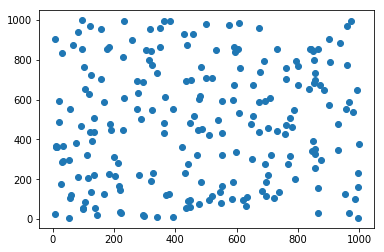

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)


In [14]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[0.0763816]]
y-axis intercept:  [444.45899061]


In [18]:
import numpy as np
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)

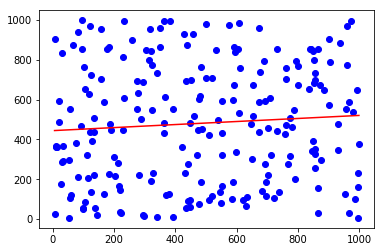

In [19]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 86947.05013156915
R-squared (R2 ): 0.00582793449137653


In [ ]:
#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
model.score(X_test, y_test)

-0.00489723209172932

In [24]:
predicted

array([[462.02675904],
       [520.45868448],
       [462.17952224],
       [477.45584262],
       [472.10913049],
       [476.6920266 ],
       [483.41360756],
       [454.84688846],
       [453.93030924],
       [517.3270388 ],
       [468.74834   ],
       [503.50196886],
       [517.86171001],
       [495.78742707],
       [494.48893984],
       [508.23762817],
       [446.82682026],
       [510.60545783],
       [458.51320535],
       [497.69696712],
       [478.98347466],
       [481.58044912],
       [445.98662264],
       [467.06794476],
       [448.58359711],
       [455.07603327],
       [496.55124309],
       [509.61249701],
       [500.44670478],
       [470.35235364],
       [490.21157013],
       [489.37137251],
       [518.39638122],
       [517.70894681],
       [471.19255126],
       [509.76526021],
       [510.52907623],
       [489.60051732],
       [486.62163484],
       [474.32419694],
       [454.15945404],
       [457.13833652],
       [460.88103501],
       [460